<a href="https://colab.research.google.com/github/sungjin-kim-data/ML/blob/master/Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [94]:
from sklearn.datasets import load_iris

iris = load_iris()

In [95]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [96]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [97]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
data, target = iris["data"], iris["target"]

In [99]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
pd.Series(target).value_counts()

0    50
1    50
2    50
dtype: int64

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [102]:
X_train,X_test, y_train, y_test = train_test_split(
    data, target, train_size=0.7, random_state=2, stratify=target
)

In [103]:
print("train data :", len(X_train))
print("test data :", len(X_test))

train data : 105
test data : 45


In [104]:
pd.Series(y_train).value_counts()

2    35
1    35
0    35
dtype: int64

In [105]:
pd.Series(y_test).value_counts()

1    15
0    15
2    15
dtype: int64

In [106]:
X = X_train[:, :2]

In [107]:
X[0]

array([6. , 2.2])

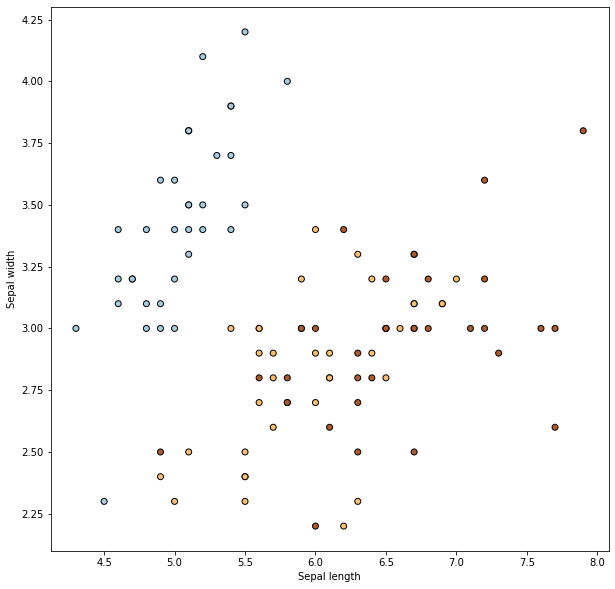

In [108]:
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y_train, ec='k', cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width");

In [109]:
ovr_logit = LogisticRegression(multi_class="ovr")
ovr_logit.fit(X, y_train)

LogisticRegression(multi_class='ovr')

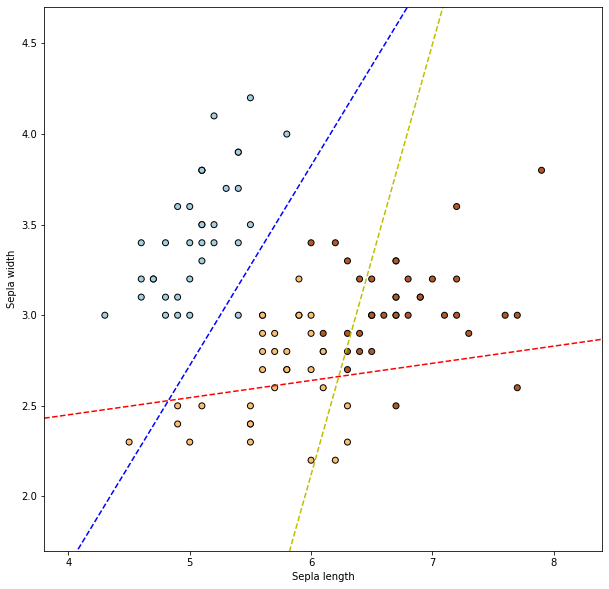

In [110]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(figsize=(10, 10))
plt.scatter(X[: ,0], X[:, 1], c=ovr_logit.predict(X), ec='k', cmap=plt.cm.Paired)
plt.xlabel("Sepla length")
plt.ylabel("Sepla width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = ovr_logit.coef_
intercept = ovr_logit.intercept_

def plot_hyperplane(c, color):
  def line(x0):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot([x_min, x_max], [line(x_min), line(x_max)],
           ls="--", color=color)

for i, color in zip(ovr_logit.classes_, "bry"):
  plot_hyperplane(i, color)

In [111]:
multi_logit = LogisticRegression(multi_class="multinomial")
multi_logit.fit(X, y_train)

LogisticRegression(multi_class='multinomial')

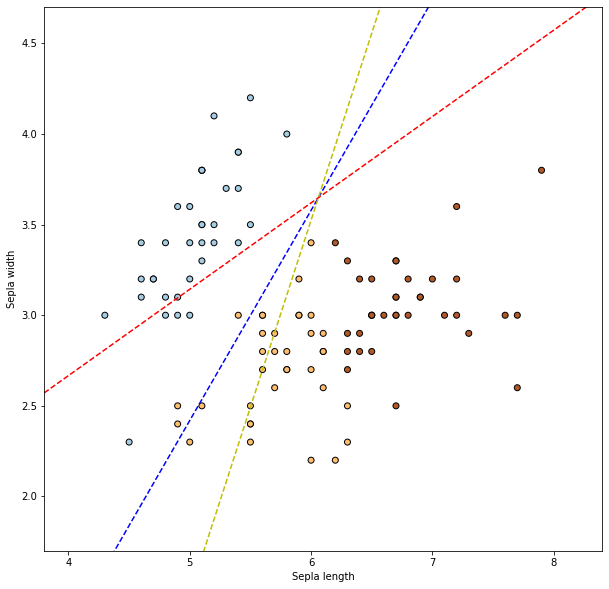

In [112]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(figsize=(10, 10))
plt.scatter(X[: ,0], X[:, 1], c=multi_logit.predict(X), ec='k', cmap=plt.cm.Paired)
plt.xlabel("Sepla length")
plt.ylabel("Sepla width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

coef = multi_logit.coef_
intercept = multi_logit.intercept_

def plot_hyperplane(c, color):
  def line(x0):
    return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
  plt.plot([x_min, x_max], [line(x_min), line(x_max)],
           ls="--", color=color)

for i, color in zip(multi_logit.classes_, "bry"):
  plot_hyperplane(i, color)

In [113]:
multi_logit = LogisticRegression()

In [114]:
multi_logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [115]:
train_pred_proba = multi_logit.predict_proba(X_train)

In [116]:
sp_pred = train_pred_proba[0]
sp_pred

array([0.00065122, 0.41689429, 0.58245449])

In [117]:
print(f"class 0에 속하지 않을 확률 : {1 - sp_pred[0]:.4f}")
print(f"class 1과 2에 속할 확률 : {sp_pred[1:].sum():.4f}")

class 0에 속하지 않을 확률 : 0.9993
class 1과 2에 속할 확률 : 0.9993


In [118]:
train_pred = multi_logit.predict(X_train)
test_pred = multi_logit.predict(X_test)

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [121]:
#@title
print(f"Train accuracy is : {train_acc:.2f}")
print(f"Test accuracy is : {test_acc:.2f}")

Train accuracy is : 0.96
Test accuracy is : 1.00


In [122]:
ovr_logit = LogisticRegression(multi_class="ovr")

In [123]:
ovr_logit.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [124]:
ovr_train_pred = ovr_logit.predict(X_train)
ovr_test_pred = ovr_logit.predict(X_test)

In [125]:
ovr_train_acc = accuracy_score(y_train, ovr_train_pred)
ovr_test_acc = accuracy_score(y_test, ovr_test_pred)

In [126]:
print(f"ovr Train accuracy is : {ovr_train_acc: .2f}")
print(f"ovr test accuracy is : {ovr_test_acc: .2f}")

ovr Train accuracy is :  0.93
ovr test accuracy is :  1.00
